In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
# File to Load
file_to_load = "..\international_airline_activity_table1_2009tocurrent_1120.csv"
# Read flights file and store into Pandas dataframe
flights_data = pd.read_csv(file_to_load)
flights_data.head()

,Month,Scheduled Operator,Country to/from,Passengers In,Freight In,Mail In,Passengers Out,Freight Out,Mail Out,Year,"<< This year is based on the month selected in cell H2 in sheet ""Totals"" - it is only a calendar year if the month in sheet ""Totals"" is set to December",Unnamed: 11
0,Jan-09,Aerolineas Argentinas,Argentina,"3,021",4.3,0.6,"1,959",8.3,0.0,2009,NaN,NaN
1,Jan-09,Aerolineas Argentinas,New Zealand,627,76.3,0.0,"1,821",68.5,0.0,2009,NaN,NaN
2,Jan-09,Air Caledonie,New Caledonia,"6,658",4.9,0.6,"5,365",68.6,1.3,2009,NaN,NaN
3,Jan-09,Air Canada,Canada,"7,489",174.8,0.0,"6,424",105.2,0.0,2009,NaN,NaN
4,Jan-09,Air China,China,"12,458",201.3,18.6,"11,163",142.4,2.9,2009,NaN,NaN


In [2]:
# mail only dataframe
mail_data = flights_data[["Year", "Month", "Country to/from", "Mail In", "Mail Out"]]
# cleaned dataframe and changed Mail In/Out types as float 
clean_mail = mail_data.fillna(0)
cleanmail_to2020 = clean_mail.replace(['..'], '0')
cleanmail_to2020['Mail In'] = pd.to_numeric(cleanmail_to2020['Mail In'])
cleanmail_to2020['Mail Out'] = pd.to_numeric(cleanmail_to2020['Mail Out'])
# cleaned dataframe WITH 2020 data
cleanmail_to2020
# cleaned dataframe WITHOUT 2020 data
cleanmail_to2019 = cleanmail_to2020[~clean_mail["Year"].isin(["2020"])]
cleanmail_to2019

,Year,Month,Country to/from,Mail In,Mail Out
0,2009,Jan-09,Argentina,0.6,0.0
1,2009,Jan-09,New Zealand,0.0,0.0
2,2009,Jan-09,New Caledonia,0.6,1.3
3,2009,Jan-09,Canada,0.0,0.0
4,2009,Jan-09,China,18.6,2.9
...,...,...,...,...,...
14009,2019,Nov-19,Tonga,0.0,0.0
14010,2019,Nov-19,USA,0.0,0.0
14011,2019,Nov-19,Vanuatu,0.0,0.0
14012,2019,Nov-19,Western Samoa,0.0,0.0


In [3]:
# Corrected Years data
# 2009 
mail_2009 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09'])]
mail_2009 = mail_2009[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2009['Year']=2009
# 2010 
mail_2010 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10'])]
mail_2010 = mail_2010[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2010['Year']=2010
# 2011 
mail_2011 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11'])]
mail_2011 = mail_2011[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2011['Year']=2011
# 2012 
mail_2012 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12'])]
mail_2012 = mail_2012[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2012['Year']=2012
# 2013 
mail_2013 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13'])]
mail_2013 = mail_2013[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2013['Year']=2013
# 2014
mail_2014 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14'])]
mail_2014 = mail_2014[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2014['Year']=2014
# 2015 
mail_2015 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15'])]
mail_2015 = mail_2015[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2015['Year']=2015
# 2016 
mail_2016 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16'])]
mail_2016 = mail_2016[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2016['Year']=2016
# 2017 
mail_2017 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17'])]
mail_2017 = mail_2017[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2017['Year']=2017
# 2018 
mail_2018 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18'])]
mail_2018 = mail_2018[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2018['Year']=2018
# 2019 
mail_2019 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19'])]
mail_2019 = mail_2019[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2019['Year']=2019
# 2020 
mail_2020 = cleanmail_to2020[cleanmail_to2020["Month"].isin(['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20'])]
mail_2020 = mail_2020[['Country to/from', 'Month', 'Mail In', 'Mail Out']]
mail_2020['Year']=2020

In [4]:
# New dataframe with correct years
merged09_10 = mail_2009.append(mail_2010)
merged11_12 = mail_2011.append(mail_2012)
merged13_14 = mail_2013.append(mail_2014)
merged15_16 = mail_2015.append(mail_2016)
merged17_18 = mail_2017.append(mail_2018)
merged19_20 = mail_2019.append(mail_2020)
merged09_12 = merged09_10.append(merged11_12)
merged13_16 = merged13_14.append(merged15_16)
merged17_20 = merged17_18.append(merged19_20)
merged09_16 = merged09_12.append(merged13_16)
newdf = merged09_16.append(merged17_20)
newdf

,Country to/from,Month,Mail In,Mail Out,Year
0,Argentina,Jan-09,0.6,0.0,2009
1,New Zealand,Jan-09,0.0,0.0,2009
2,New Caledonia,Jan-09,0.6,1.3,2009
3,Canada,Jan-09,0.0,0.0,2009
4,China,Jan-09,18.6,2.9,2009
...,...,...,...,...,...
15052,Korea,Nov-20,0.0,0.0,2020
15053,Singapore,Nov-20,0.0,0.0,2020
15054,USA,Nov-20,0.0,0.0,2020
15055,Vietnam,Nov-20,0.0,8.8,2020


In [5]:
# Months performance over 2009-2020
jan = newdf[newdf["Month"].isin(['Jan-09', 'Jan-10', 'Jan-11', 'Jan-12', 'Jan-13', 'Jan-14', 'Jan-15', 'Jan-15', 'Jan-16', 'Jan-17', 'Jan-18', 'Jan-19', 'Jan-20'])]
feb = newdf[newdf["Month"].isin(['Feb-09', 'Feb-10', 'Feb-11', 'Feb-12', 'Feb-13', 'Feb-14', 'Feb-15', 'Feb-15', 'Feb-16', 'Feb-17', 'Feb-18', 'Feb-19', 'Feb-20'])]
mar = newdf[newdf["Month"].isin(['Mar-09', 'Mar-10', 'Mar-11', 'Mar-12', 'Mar-13', 'Mar-14', 'Mar-15', 'Mar-15', 'Mar-16', 'Mar-17', 'Mar-18', 'Mar-19', 'Mar-20'])]
apr = newdf[newdf["Month"].isin(['Apr-09', 'Apr-10', 'Apr-11', 'Apr-12', 'Apr-13', 'Apr-14', 'Apr-15', 'Apr-15', 'Apr-16', 'Apr-17', 'Apr-18', 'Apr-19', 'Apr-20'])]
may = newdf[newdf["Month"].isin(['May-09', 'May-10', 'May-11', 'May-12', 'May-13', 'May-14', 'May-15', 'May-15', 'May-16', 'May-17', 'May-18', 'May-19', 'May-20'])]
jun = newdf[newdf["Month"].isin(['Jun-09', 'Jun-10', 'Jun-11', 'Jun-12', 'Jun-13', 'Jun-14', 'Jun-15', 'Jun-15', 'Jun-16', 'Jun-17', 'Jun-18', 'Jun-19', 'Jun-20'])]
jul = newdf[newdf["Month"].isin(['Jul-09', 'Jul-10', 'Jul-11', 'Jul-12', 'Jul-13', 'Jul-14', 'Jul-15', 'Jul-15', 'Jul-16', 'Jul-17', 'Jul-18', 'Jul-19', 'Jul-20'])]
aug = newdf[newdf["Month"].isin(['Aug-09', 'Aug-10', 'Aug-11', 'Aug-12', 'Aug-13', 'Aug-14', 'Aug-15', 'Aug-15', 'Aug-16', 'Aug-17', 'Aug-18', 'Aug-19', 'Aug-20'])]
sep = newdf[newdf["Month"].isin(['Sep-09', 'Sep-10', 'Sep-11', 'Sep-12', 'Sep-13', 'Sep-14', 'Sep-15', 'Sep-15', 'Sep-16', 'Sep-17', 'Sep-18', 'Sep-19', 'Sep-20'])]
oct = newdf[newdf["Month"].isin(['Oct-09', 'Oct-10', 'Oct-11', 'Oct-12', 'Oct-13', 'Oct-14', 'Oct-15', 'Oct-15', 'Oct-16', 'Oct-17', 'Oct-18', 'Oct-19', 'Oct-20'])]
nov = newdf[newdf["Month"].isin(['Nov-09', 'Nov-10', 'Nov-11', 'Nov-12', 'Nov-13', 'Nov-14', 'Nov-15', 'Nov-15', 'Nov-16', 'Nov-17', 'Nov-18', 'Nov-19', 'Nov-20'])]
dec = newdf[newdf["Month"].isin(['Dec-09', 'Dec-10', 'Dec-11', 'Dec-12', 'Dec-13', 'Dec-14', 'Dec-15', 'Dec-15', 'Dec-16', 'Dec-17', 'Dec-18', 'Dec-19', 'Dec-20'])]

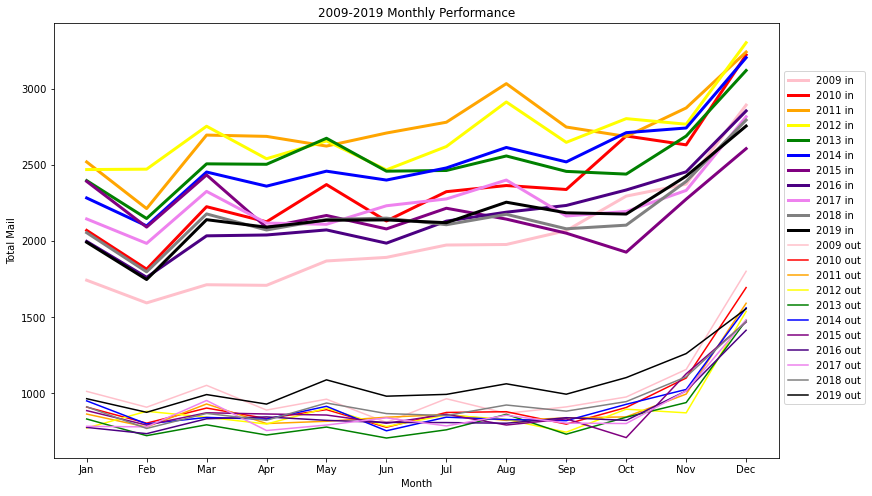

In [6]:
# Analysing how the years performed on a monthly basis (Mail In)
mail_in_2009 = mail_2009.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2010 = mail_2010.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2011 = mail_2011.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2012 = mail_2012.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2013 = mail_2013.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2014 = mail_2014.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2015 = mail_2015.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2016 = mail_2016.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2017 = mail_2017.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2018 = mail_2018.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2019 = mail_2019.groupby(["Month"],sort=False)["Mail In"].sum()
mail_in_2020 = mail_2020.groupby(["Month"],sort=False)["Mail In"].sum()
# Analysing how the years performed on a monthly basis (Mail Out)
mail_out_2009 = mail_2009.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2010 = mail_2010.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2011 = mail_2011.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2012 = mail_2012.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2013 = mail_2013.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2014 = mail_2014.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2015 = mail_2015.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2016 = mail_2016.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2017 = mail_2017.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2018 = mail_2018.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2019 = mail_2019.groupby(["Month"],sort=False)["Mail Out"].sum()
mail_out_2020 = mail_2020.groupby(["Month"],sort=False)["Mail Out"].sum()
# Plot Mail In/Out Monthly Trend
fig1, ax1 = plt.subplots(figsize=(13,8))
xcoord = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# 2009 - 2019 Mail In
plt.plot(xcoord, mail_in_2009, label='2009 in', color='pink', linewidth=3.0)
plt.plot(xcoord, mail_in_2010, label='2010 in', color='red', linewidth=3.0)
plt.plot(xcoord, mail_in_2011, label='2011 in', color='orange', linewidth=3.0)
plt.plot(xcoord, mail_in_2012, label='2012 in', color='yellow', linewidth=3.0)
plt.plot(xcoord, mail_in_2013, label='2013 in', color='green', linewidth=3.0)
plt.plot(xcoord, mail_in_2014, label='2014 in', color='blue', linewidth=3.0)
plt.plot(xcoord, mail_in_2015, label='2015 in', color='purple', linewidth=3.0)
plt.plot(xcoord, mail_in_2016, label='2016 in', color='indigo', linewidth=3.0)
plt.plot(xcoord, mail_in_2017, label='2017 in', color='violet', linewidth=3.0)
plt.plot(xcoord, mail_in_2018, label='2018 in', color='grey', linewidth=3.0)
plt.plot(xcoord, mail_in_2019, label='2019 in', color='black', linewidth=3.0)
# 2009 - 2019 Mail Out
plt.plot(xcoord, mail_out_2009, label='2009 out', color='pink')
plt.plot(xcoord, mail_out_2010, label='2010 out', color='red')
plt.plot(xcoord, mail_out_2011, label='2011 out', color='orange')
plt.plot(xcoord, mail_out_2012, label='2012 out', color='yellow')
plt.plot(xcoord, mail_out_2013, label='2013 out', color='green')
plt.plot(xcoord, mail_out_2014, label='2014 out', color='blue')
plt.plot(xcoord, mail_out_2015, label='2015 out', color='purple')
plt.plot(xcoord, mail_out_2016, label='2016 out', color='indigo')
plt.plot(xcoord, mail_out_2017, label='2017 out', color='violet')
plt.plot(xcoord, mail_out_2018, label='2018 out', color='grey')
plt.plot(xcoord, mail_out_2019, label='2019 out', color='black')
plt.legend()
plt.title("2009-2019 Monthly Performance")
plt.xlabel("Month")
plt.ylabel("Total Mail")
plt.legend(bbox_to_anchor=(1,0.9))

Text(0, 0.5, 'Total Mail In')

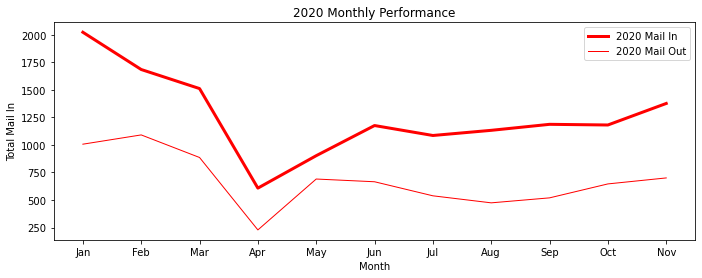

In [7]:
# Analysing how 2020 performed on a monthly basis
mail_in_2020 = mail_2020.groupby(["Month"],sort=False)["Mail In"].sum()
# 2020 Total Mail In
xcoord = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
fig1, ax1 = plt.subplots(figsize=(11.5,4))
plt.plot(xcoord, mail_in_2020, label='2020 Mail In', color='red', linewidth=3.0)
plt.plot(xcoord, mail_out_2020, label='2020 Mail Out', color='red', linewidth=1.0)
plt.legend()
plt.title("2020 Monthly Performance")
plt.xlabel("Month")
plt.ylabel("Total Mail In")

In [8]:
# Collect all Mail In Data and merge into a single dataframe to plot the whole timeframe 
df09 = pd.DataFrame([mail_in_2009]).T
df10 = pd.DataFrame([mail_in_2010]).T
df09_10 = pd.merge(df09, df10, on=['Mail In'], how='outer', sort=False)
df11 = pd.DataFrame([mail_in_2011]).T
df12 = pd.DataFrame([mail_in_2012]).T
df11_12 = pd.merge(df11, df12, on=['Mail In'], how='outer', sort=False)
df0910_1112 = pd.merge(df09_10, df11_12, on=['Mail In'], how='outer', sort=False)
df13 = pd.DataFrame([mail_in_2013]).T
df14 = pd.DataFrame([mail_in_2014]).T
df13_14 = pd.merge(df13, df14, on=['Mail In'], how='outer', sort=False)
df15 = pd.DataFrame([mail_in_2015]).T
df16 = pd.DataFrame([mail_in_2016]).T
df15_16 = pd.merge(df15, df16, on=['Mail In'], how='outer', sort=False)
df1314_1516 = pd.merge(df13_14, df15_16, on=['Mail In'], how='outer', sort=False)
df17 = pd.DataFrame([mail_in_2017]).T
df18 = pd.DataFrame([mail_in_2018]).T
df17_18 = pd.merge(df17, df18, on=['Mail In'], how='outer', sort=False)
df19 = pd.DataFrame([mail_in_2019]).T
df20 = pd.DataFrame([mail_in_2020]).T
df19_20 = pd.merge(df19, df20, on=['Mail In'], how='outer', sort=False)
df1718_1920 = pd.merge(df17_18, df19_20, on=['Mail In'], how='outer', sort=False)
df09_16 = pd.merge(df0910_1112, df1314_1516, on=['Mail In'], how='outer', sort=False)
df09_20 = pd.merge(df09_16, df1718_1920, on=['Mail In'], how='outer', sort=False)
# Collect all Mail Out Data and merge into a single dataframe to plot the whole timeframe 
odf09 = pd.DataFrame([mail_out_2009]).T
odf10 = pd.DataFrame([mail_out_2010]).T
odf09_10 = pd.merge(odf09, odf10, on=['Mail Out'], how='outer', sort=False)
odf11 = pd.DataFrame([mail_out_2011]).T
odf12 = pd.DataFrame([mail_out_2012]).T
odf11_12 = pd.merge(odf11, odf12, on=['Mail Out'], how='outer', sort=False)
odf0910_1112 = pd.merge(odf09_10, odf11_12, on=['Mail Out'], how='outer', sort=False)
odf13 = pd.DataFrame([mail_out_2013]).T
odf14 = pd.DataFrame([mail_out_2014]).T
odf13_14 = pd.merge(odf13, odf14, on=['Mail Out'], how='outer', sort=False)
odf15 = pd.DataFrame([mail_out_2015]).T
odf16 = pd.DataFrame([mail_out_2016]).T
odf15_16 = pd.merge(odf15, odf16, on=['Mail Out'], how='outer', sort=False)
odf1314_1516 = pd.merge(odf13_14, odf15_16, on=['Mail Out'], how='outer', sort=False)
odf17 = pd.DataFrame([mail_out_2017]).T
odf18 = pd.DataFrame([mail_out_2018]).T
odf17_18 = pd.merge(odf17, odf18, on=['Mail Out'], how='outer', sort=False)
odf19 = pd.DataFrame([mail_out_2019]).T
odf20 = pd.DataFrame([mail_out_2020]).T
odf19_20 = pd.merge(odf19, odf20, on=['Mail Out'], how='outer', sort=False)
odf1718_1920 = pd.merge(odf17_18, odf19_20, on=['Mail Out'], how='outer', sort=False)
odf09_16 = pd.merge(odf0910_1112, odf1314_1516, on=['Mail Out'], how='outer', sort=False)
odf09_20 = pd.merge(odf09_16, odf1718_1920, on=['Mail Out'], how='outer', sort=False)

Text(0, 0.5, 'Total Mail In/Out')

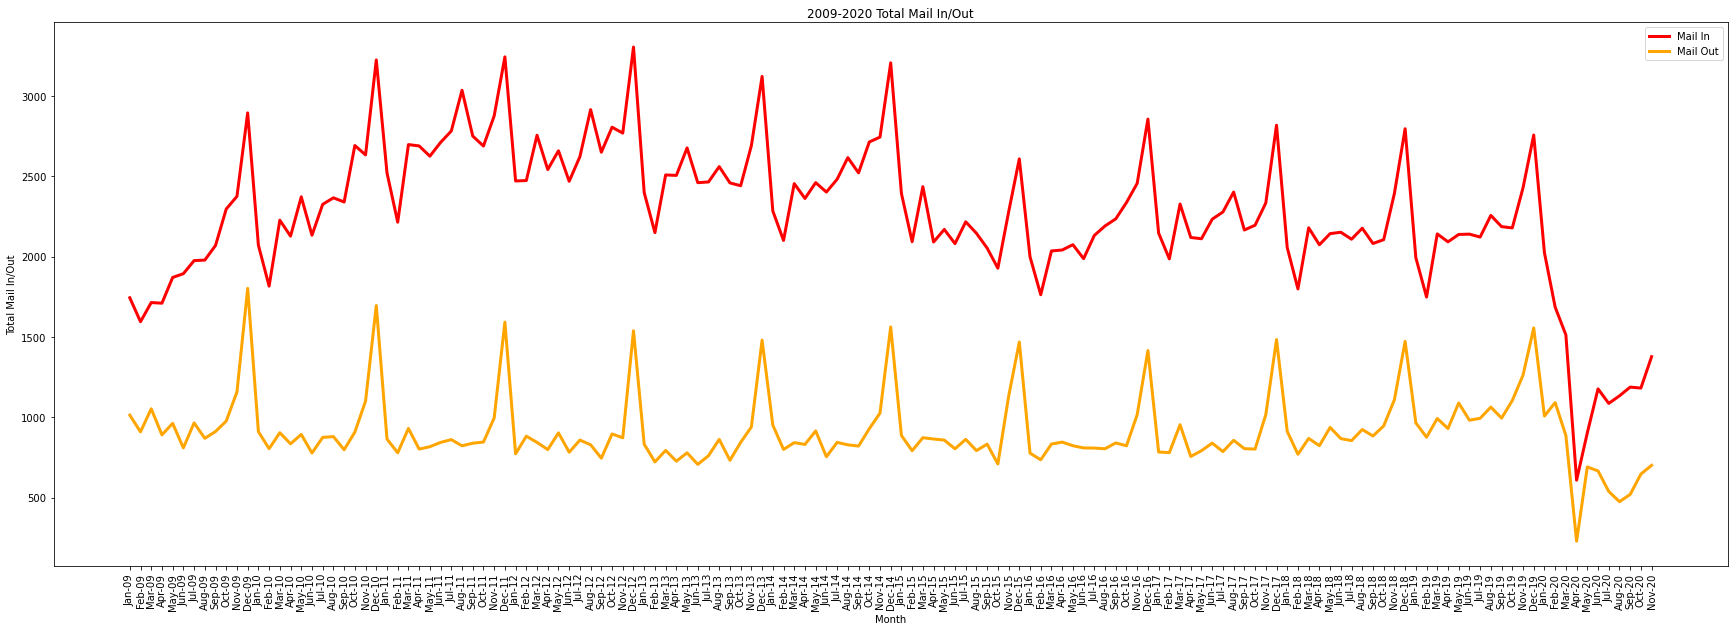

In [9]:
# Plot all data from Jan 2009 - Nov 2020
xcoord = ['Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09', 'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12', 'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20']
fig1, ax1 = plt.subplots(figsize=(30,10))
plt.plot(xcoord, df09_20, label='Mail In', color="red", linewidth=3.0)
plt.plot(xcoord, odf09_20, label='Mail Out', color="orange", linewidth=3.0)
plt.legend()
plt.title("2009-2020 Total Mail In/Out")
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Total Mail In/Out")

In [10]:
# setup datasets
jan_19df= jan[~jan["Month"].isin(["Jan-20"])]
jan_19in = jan_19df[["Year", "Month", "Mail In"]]
jan_19out = jan_19df[["Year", "Month", "Mail Out"]]
feb_19df= feb[~feb["Month"].isin(["Feb-20"])]
feb_19in = feb_19df[["Year", "Month", "Mail In"]]
feb_19out = feb_19df[["Year", "Month", "Mail Out"]]
mar_19df= mar[~mar["Month"].isin(["Mar-20"])]
mar_19in = mar_19df[["Year", "Month", "Mail In"]]
mar_19out = mar_19df[["Year", "Month", "Mail Out"]]
apr_19df= apr[~apr["Month"].isin(["Apr-20"])]
apr_19in = apr_19df[["Year", "Month", "Mail In"]]
apr_19out = apr_19df[["Year", "Month", "Mail Out"]]
may_19df= may[~may["Month"].isin(["May-20"])]
may_19in = may_19df[["Year", "Month", "Mail In"]]
may_19out = may_19df[["Year", "Month", "Mail Out"]]
jun_19df= jun[~jun["Month"].isin(["Jun-20"])]
jun_19in = jun_19df[["Year", "Month", "Mail In"]]
jun_19out = jun_19df[["Year", "Month", "Mail Out"]]
jul_19df= jul[~jul["Month"].isin(["Jul-20"])]
jul_19in = jul_19df[["Year", "Month", "Mail In"]]
jul_19out = jul_19df[["Year", "Month", "Mail Out"]]
aug_19df= aug[~aug["Month"].isin(["Aug-20"])]
aug_19in = aug_19df[["Year", "Month", "Mail In"]]
aug_19out = aug_19df[["Year", "Month", "Mail Out"]]
sep_19df= sep[~sep["Month"].isin(["Sep-20"])]
sep_19in = sep_19df[["Year", "Month", "Mail In"]]
sep_19out = sep_19df[["Year", "Month", "Mail Out"]]
oct_19df= oct[~oct["Month"].isin(["Oct-20"])]
oct_19in = oct_19df[["Year", "Month", "Mail In"]]
oct_19out = oct_19df[["Year", "Month", "Mail Out"]]
nov_19df= nov[~nov["Month"].isin(["Nov-20"])]
nov_19in = nov_19df[["Year", "Month", "Mail In"]]
nov_19out = nov_19df[["Year", "Month", "Mail Out"]]
dec_19df= dec[~dec["Month"].isin(["Dec-20"])]
dec_19in = dec_19df[["Year", "Month", "Mail In"]]
dec_19out = dec_19df[["Year", "Month", "Mail Out"]]

In [11]:
# All years excluding Dec
months_mailin1 = pd.DataFrame(jan.groupby(["Year"])["Mail In"].sum())
months_mailin2 = feb.groupby(["Year"])["Mail In"].sum()
months_mailin_jf = months_mailin1.merge(months_mailin2, left_index=True, right_index=True)
months_mailin_jf.columns = ["Jan Mail In", "Feb Mail In"]
months_mailin3 = pd.DataFrame(mar.groupby(["Year"])["Mail In"].sum())
months_mailin4 = apr.groupby(["Year"])["Mail In"].sum()
months_mailin_ma = months_mailin3.merge(months_mailin4, left_index=True, right_index=True)
months_mailin_ma.columns = ["Mar Mail In", "Apr Mail In"]
months_mailin5 = pd.DataFrame(may.groupby(["Year"])["Mail In"].sum())
months_mailin6 = jun.groupby(["Year"])["Mail In"].sum()
months_mailin_mj = months_mailin5.merge(months_mailin6, left_index=True, right_index=True)
months_mailin_mj.columns = ["May Mail In", "Jun Mail In"]
months_mailin_janapr = months_mailin_jf.merge(months_mailin_ma, left_index=True, right_index=True)
months_mailin_janjun = months_mailin_janapr.merge(months_mailin_mj, left_index=True, right_index=True)
months_mailin7 = pd.DataFrame(jul.groupby(["Year"])["Mail In"].sum())
months_mailin8 = aug.groupby(["Year"])["Mail In"].sum()
months_mailin_ja = months_mailin7.merge(months_mailin8, left_index=True, right_index=True)
months_mailin_ja.columns = ["Jul Mail In", "Aug Mail In"]
months_mailin9 = pd.DataFrame(sep.groupby(["Year"])["Mail In"].sum())
months_mailin10 = oct.groupby(["Year"])["Mail In"].sum()
months_mailin_so = months_mailin9.merge(months_mailin10, left_index=True, right_index=True)
months_mailin_so.columns = ["Sep Mail In", "Oct Mail In"]
months_mailin11 = pd.DataFrame(nov.groupby(["Year"])["Mail In"].sum())
months_mailin11.columns = ["Nov Mail In"]
months_mailin_juloct = months_mailin_ja.merge(months_mailin_so, left_index=True, right_index=True)
months_mailin_julnov = months_mailin_juloct.merge(months_mailin11, left_index=True, right_index=True)
actualmonths_mailin20 = months_mailin_janjun.merge(months_mailin_julnov, left_index=True, right_index=True)
actualmonths_mailin20 = actualmonths_mailin20.reset_index()
# without 2020
actualmonths_mailin19 = actualmonths_mailin20[~actualmonths_mailin20["Year"].isin(["2020"])]
actualmonths_mailin19
# include December 
months_mailin12 = dec.groupby(["Year"])["Mail In"].sum()
months_mailin_nd = months_mailin11.merge(months_mailin12, left_index=True, right_index=True)
months_mailin_nd.columns = ["Nov Mail In", "Dec Mail In"]
months_mailin_juldec = months_mailin_juloct.merge(months_mailin_nd, left_index=True, right_index=True)
actualmonths_mailin19 = months_mailin_janjun.merge(months_mailin_juldec, left_index=True, right_index=True)
actualmonths_mailin19 = actualmonths_mailin19.reset_index()
actualmonths_mailin19
# Add 0 value in Dec 2020
actualmonths_mailin_only2020 = actualmonths_mailin20[actualmonths_mailin20["Year"].isin(["2020"])]
actualmonths_mailin_only2020["Dec Mail In"] = 0
# Reset the dataframe to include all months from Jan-Dec throughout 2009 - 2020
actual_mailin_with2020 = actualmonths_mailin19.append(actualmonths_mailin_only2020)
actual_mailin_with2020

,Year,Jan Mail In,Feb Mail In,Mar Mail In,Apr Mail In,May Mail In,Jun Mail In,Jul Mail In,Aug Mail In,Sep Mail In,Oct Mail In,Nov Mail In,Dec Mail In
0,2009,1743.8,1594.7,1714.0,1710.1,1870.2,1893.8,1975.0,1978.5,2069.4,2296.4,2375.2,2894.7
1,2010,2071.1,1816.4,2226.8,2127.4,2372.3,2133.1,2325.6,2366.0,2340.0,2691.6,2633.3,3224.3
2,2011,2521.1,2214.5,2697.5,2689.0,2625.2,2711.0,2782.0,3035.6,2750.5,2688.4,2875.9,3243.5
3,2012,2470.9,2473.5,2755.6,2542.0,2658.9,2469.0,2622.4,2915.1,2649.8,2805.6,2768.9,3304.7
4,2013,2398.2,2149.2,2508.5,2505.6,2676.6,2460.3,2464.9,2560.3,2458.9,2441.1,2691.1,3121.9
5,2014,2284.3,2100.7,2454.7,2361.9,2460.4,2401.9,2481.6,2616.1,2521.3,2713.4,2744.1,3206.2
6,2015,2393.2,2092.8,2435.5,2090.8,2169.2,2080.8,2216.7,2145.3,2052.9,1928.1,2276.4,2608.4
7,2016,1998.8,1762.8,2035.4,2041.0,2074.3,1987.3,2132.0,2190.8,2235.0,2336.7,2456.1,2856.3
8,2017,2146.4,1985.8,2327.5,2119.2,2111.3,2233.0,2277.9,2401.9,2165.7,2195.5,2333.9,2818.1
9,2018,2056.1,1798.8,2179.4,2073.8,2143.1,2151.7,2108.4,2176.8,2081.6,2105.6,2393.1,2796.1


Text(0, 0.5, 'Mail In')

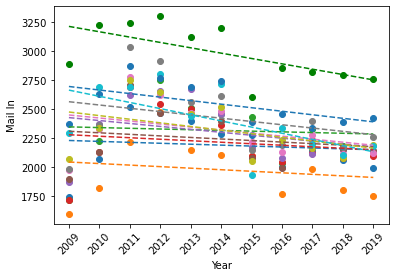

In [12]:
## Q1
# Perform a linear regression on year versus jan_mailin
year = actualmonths_mailin19.iloc[:,0]
jan_mailin = actualmonths_mailin19.iloc[:,1]
janin_slope, janin_int, janin_r, janin_p, janin_std_err = stats.linregress(year, jan_mailin)
janin_fit = janin_slope * year + janin_int
plt.scatter(year,jan_mailin)
plt.plot(year,janin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus feb_mailin
year = actualmonths_mailin19.iloc[:,0]
feb_mailin = actualmonths_mailin19.iloc[:,2]
febin_slope, febin_int, febin_r, febin_p, febin_std_err = stats.linregress(year, feb_mailin)
febin_fit = febin_slope * year + febin_int
plt.scatter(year,feb_mailin)
plt.plot(year,febin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus mar_mailin
year = actualmonths_mailin19.iloc[:,0]
mar_mailin = actualmonths_mailin19.iloc[:,3]
marin_slope, marin_int, marin_r, marin_p, marin_std_err = stats.linregress(year, mar_mailin)
marin_fit = marin_slope * year + marin_int
plt.scatter(year,mar_mailin)
plt.plot(year,marin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('March Mail In')
## Q2
# Perform a linear regression on year versus apr_mailin
year = actualmonths_mailin19.iloc[:,0]
apr_mailin = actualmonths_mailin19.iloc[:,4]
aprin_slope, aprin_int, aprin_r, aprin_p, aprin_std_err = stats.linregress(year, apr_mailin)
aprin_fit = aprin_slope * year + aprin_int
plt.scatter(year,apr_mailin)
plt.plot(year,aprin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus may_mailin
year = actualmonths_mailin19.iloc[:,0]
may_mailin = actualmonths_mailin19.iloc[:,5]
mayin_slope, mayin_int, mayin_r, mayin_p, mayin_std_err = stats.linregress(year, may_mailin)
mayin_fit = mayin_slope * year + mayin_int
plt.scatter(year,may_mailin)
plt.plot(year,mayin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus jun_mailin
year = actualmonths_mailin19.iloc[:,0]
jun_mailin = actualmonths_mailin19.iloc[:,6]
junin_slope, junin_int, junin_r, junin_p, junin_std_err = stats.linregress(year, jun_mailin)
junin_fit = junin_slope * year + junin_int
plt.scatter(year,jun_mailin)
plt.plot(year,junin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
## Q3
# Perform a linear regression on year versus jul_mailin
year = actualmonths_mailin19.iloc[:,0]
jul_mailin = actualmonths_mailin19.iloc[:,7]
julin_slope, julin_int, julin_r, julin_p, julin_std_err = stats.linregress(year, jul_mailin)
julin_fit = julin_slope * year + julin_int
plt.scatter(year,jul_mailin)
plt.plot(year,julin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus aug_mailin
year = actualmonths_mailin19.iloc[:,0]
aug_mailin = actualmonths_mailin19.iloc[:,8]
augin_slope, augin_int, augin_r, augin_p, augin_std_err = stats.linregress(year, aug_mailin)
augin_fit = augin_slope * year + augin_int
plt.scatter(year,aug_mailin)
plt.plot(year,augin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus sep_mailin
year = actualmonths_mailin19.iloc[:,0]
sep_mailin = actualmonths_mailin19.iloc[:,9]
sepin_slope, sepin_int, sepin_r, sepin_p, sepin_std_err = stats.linregress(year, sep_mailin)
sepin_fit = sepin_slope * year + sepin_int
plt.scatter(year,sep_mailin)
plt.plot(year,sepin_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
## Q4
# Perform a linear regression on year versus oct_mailin
year10 = actualmonths_mailin19.iloc[:,0]
oct_mailin = actualmonths_mailin19.iloc[:,10]
octin_slope, octin_int, octin_r, octin_p, octin_std_err = stats.linregress(year10, oct_mailin)
octin_fit = octin_slope * year10 + octin_int
plt.scatter(year10,oct_mailin)
plt.plot(year10,octin_fit,"--")
plt.xticks(year10, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus nov_mailin
year11 = actualmonths_mailin19.iloc[:,0]
nov_mailin = actualmonths_mailin19.iloc[:,11]
novin_slope, novin_int, novin_r, novin_p, novin_std_err = stats.linregress(year11, nov_mailin)
novin_fit = novin_slope * year11 + novin_int
plt.scatter(year11,nov_mailin)
plt.plot(year11,novin_fit,"--")
plt.xticks(year11, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')
# Perform a linear regression on year versus dec_mailin
year12 = actualmonths_mailin19.iloc[:,0]
dec_mailin = actualmonths_mailin19.iloc[:,12]
decin_slope, decin_int, decin_r, decin_p, decin_std_err = stats.linregress(year12, dec_mailin)
decin_fit = decin_slope * year12 + decin_int
plt.scatter(year12,dec_mailin, color="g")
plt.plot(year12,decin_fit,"--", color="g")
plt.xticks(year12, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail In')

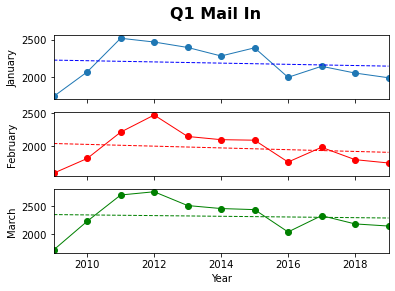

In [13]:
 # Generate a facet plot of all Q1 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q1 Mail In", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, jan_mailin, linewidth=1, marker="o")
ax1.plot(year, janin_fit, "b--", linewidth=1)
ax1.set_ylabel("January")
ax2.plot(year, feb_mailin, linewidth=1, marker="o", color="r")
ax2.plot(year, febin_fit, "r--", linewidth=1)
ax2.set_ylabel("February")
ax3.plot(year, mar_mailin, linewidth=1, marker="o", color="g")
ax3.plot(year, marin_fit, "g--", linewidth=1)
ax3.set_ylabel("March")
ax3.set_xlabel("Year")
plt.show()

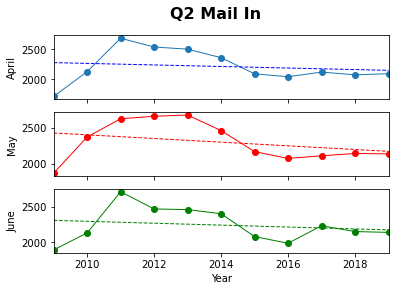

In [14]:
 # Generate a facet plot of all Q2 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q2 Mail In", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, apr_mailin, linewidth=1, marker="o")
ax1.plot(year, aprin_fit, "b--", linewidth=1)
ax1.set_ylabel("April")
ax2.plot(year, may_mailin, linewidth=1, marker="o", color="r")
ax2.plot(year, mayin_fit, "r--", linewidth=1)
ax2.set_ylabel("May")
ax3.plot(year, jun_mailin, linewidth=1, marker="o", color="g")
ax3.plot(year, junin_fit, "g--", linewidth=1)
ax3.set_ylabel("June")
ax3.set_xlabel("Year")
plt.show()

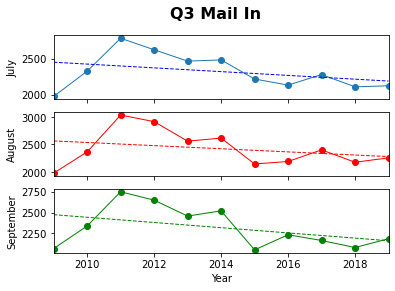

In [15]:
 # Generate a facet plot of all Q3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q3 Mail In", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, jul_mailin, linewidth=1, marker="o")
ax1.plot(year, julin_fit, "b--", linewidth=1)
ax1.set_ylabel("July")
ax2.plot(year, aug_mailin, linewidth=1, marker="o", color="r")
ax2.plot(year, augin_fit, "r--", linewidth=1)
ax2.set_ylabel("August")
ax3.plot(year, sep_mailin, linewidth=1, marker="o", color="g")
ax3.plot(year, sepin_fit, "g--", linewidth=1)
ax3.set_ylabel("September")
ax3.set_xlabel("Year")
plt.show()

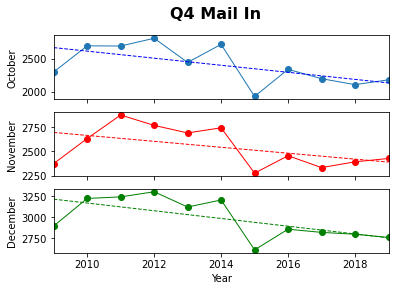

In [16]:
# Generate a facet plot of all Q4 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q4 Mail In", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, oct_mailin, linewidth=1, marker="o")
ax1.plot(year, octin_fit, "b--", linewidth=1)
ax1.set_ylabel("October")
ax2.plot(year, nov_mailin, linewidth=1, marker="o", color="r")
ax2.plot(year, novin_fit, "r--", linewidth=1)
ax2.set_ylabel("November")
ax3.plot(year, dec_mailin, linewidth=1, marker="o", color="g")
ax3.plot(year, decin_fit, "g--", linewidth=1)
ax3.set_ylabel("December")
ax3.set_xlabel("Year")
plt.show()

In [17]:
# All years excluding Dec
months_mailout1 = pd.DataFrame(jan.groupby(["Year"])["Mail Out"].sum())
months_mailout2 = feb.groupby(["Year"])["Mail Out"].sum()
months_mailout_jf = months_mailout1.merge(months_mailout2, left_index=True, right_index=True)
months_mailout_jf.columns = ["Jan Mail Out", "Feb Mail Out"]
months_mailout3 = pd.DataFrame(mar.groupby(["Year"])["Mail Out"].sum())
months_mailout4 = apr.groupby(["Year"])["Mail Out"].sum()
months_mailout_ma = months_mailout3.merge(months_mailout4, left_index=True, right_index=True)
months_mailout_ma.columns = ["Mar Mail Out", "Apr Mail Out"]
months_mailout5 = pd.DataFrame(may.groupby(["Year"])["Mail Out"].sum())
months_mailout6 = jun.groupby(["Year"])["Mail Out"].sum()
months_mailout_mj = months_mailout5.merge(months_mailout6, left_index=True, right_index=True)
months_mailout_mj.columns = ["May Mail Out", "Jun Mail Out"]
months_mailout_janapr = months_mailout_jf.merge(months_mailout_ma, left_index=True, right_index=True)
months_mailout_janjun = months_mailout_janapr.merge(months_mailout_mj, left_index=True, right_index=True)
months_mailout7 = pd.DataFrame(jul.groupby(["Year"])["Mail Out"].sum())
months_mailout8 = aug.groupby(["Year"])["Mail Out"].sum()
months_mailout_ja = months_mailout7.merge(months_mailout8, left_index=True, right_index=True)
months_mailout_ja.columns = ["Jul Mail Out", "Aug Mail Out"]
months_mailout9 = pd.DataFrame(sep.groupby(["Year"])["Mail Out"].sum())
months_mailout10 = oct.groupby(["Year"])["Mail Out"].sum()
months_mailout_so = months_mailin9.merge(months_mailout10, left_index=True, right_index=True)
months_mailout_so.columns = ["Sep Mail Out", "Oct Mail Out"]
months_mailout11 = pd.DataFrame(nov.groupby(["Year"])["Mail Out"].sum())
months_mailout11.columns = ["Nov Mail Out"]
months_mailout_juloct = months_mailout_ja.merge(months_mailout_so, left_index=True, right_index=True)
months_mailout_julnov = months_mailout_juloct.merge(months_mailout11, left_index=True, right_index=True)
actualmonths_mailout20 = months_mailout_janjun.merge(months_mailout_julnov, left_index=True, right_index=True)
actualmonths_mailout20 = actualmonths_mailout20.reset_index()
# without 2020
actualmonths_mailout19 = actualmonths_mailout20[~actualmonths_mailout20["Year"].isin(["2020"])]
actualmonths_mailout19
# include December 
months_mailout12 = dec.groupby(["Year"])["Mail Out"].sum()
months_mailout_nd = months_mailout11.merge(months_mailout12, left_index=True, right_index=True)
months_mailout_nd.columns = ["Nov Mail Out", "Dec Mail Out"]
months_mailout_juldec = months_mailout_juloct.merge(months_mailout_nd, left_index=True, right_index=True)
actualmonths_mailout19 = months_mailout_janjun.merge(months_mailout_juldec, left_index=True, right_index=True)
actualmonths_mailout19 = actualmonths_mailout19.reset_index()
actualmonths_mailout19
# Add 0 value in Dec 2020
actualmonths_mailout_only2020 = actualmonths_mailout20[actualmonths_mailout20["Year"].isin(["2020"])]
actualmonths_mailout_only2020["Dec Mail Out"] = 0
# Reset the dataframe to include all months from Jan-Dec throughout 2009 - 2020
actual_mailout_with2020 = actualmonths_mailout19.append(actualmonths_mailout_only2020)
actual_mailout_with2020

,Year,Jan Mail Out,Feb Mail Out,Mar Mail Out,Apr Mail Out,May Mail Out,Jun Mail Out,Jul Mail Out,Aug Mail Out,Sep Mail Out,Oct Mail Out,Nov Mail Out,Dec Mail Out
0,2009,1013.2,909.2,1052.8,890.3,961.9,809.2,964.9,868.9,2069.4,976.4,1157.5,1802.4
1,2010,910.1,804.3,903.7,834.6,893.2,777.3,874.6,879.6,2340.0,907.4,1100.9,1695.4
2,2011,864.2,778.8,930.4,801.8,816.7,843.3,860.8,822.3,2750.5,845.7,995.5,1592.3
3,2012,772.4,882.3,843.5,798.7,902.7,782.3,858.0,828.6,2649.8,896.1,872.1,1538.6
4,2013,831.8,722.2,793.6,726.4,778.7,706.6,760.6,862.1,2458.9,843.4,939.7,1480.2
5,2014,950.9,799.8,842.0,830.8,915.1,754.2,843.7,828.3,2521.3,928.2,1025.9,1562.4
6,2015,886.8,791.8,872.6,864.6,857.7,803.7,862.5,792.2,2052.9,709.4,1128.6,1468.4
7,2016,776.6,735.3,833.2,845.4,822.7,809.1,808.2,803.9,2235.0,822.5,1016.3,1415.0
8,2017,783.6,779.8,953.3,755.9,792.0,839.1,786.1,856.4,2165.7,801.9,1015.9,1484.0
9,2018,912.1,769.5,868.3,823.1,936.6,867.2,854.3,923.6,2081.6,946.0,1108.9,1472.4


Text(0, 0.5, 'Mail Out')

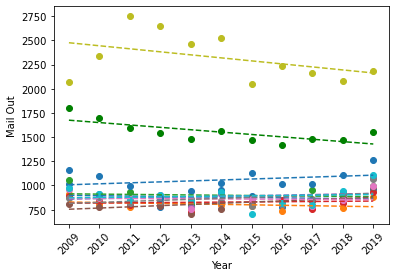

In [18]:
## Q1
# Perform a linear regression on year versus jan_mailout
year = actualmonths_mailout19.iloc[:,0]
jan_mailout = actualmonths_mailout19.iloc[:,1]
janout_slope, janout_int, janout_r, janout_p, janout_std_err = stats.linregress(year, jan_mailout)
janout_fit = janout_slope * year + janout_int
plt.scatter(year,jan_mailout)
plt.plot(year,janout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus feb_mailout
year = actualmonths_mailout19.iloc[:,0]
feb_mailout = actualmonths_mailout19.iloc[:,2]
febout_slope, febout_int, febout_r, febout_p, febout_std_err = stats.linregress(year, feb_mailout)
febout_fit = febout_slope * year + febout_int
plt.scatter(year,feb_mailout)
plt.plot(year,febout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus mar_mailout
year = actualmonths_mailout19.iloc[:,0]
mar_mailout = actualmonths_mailout19.iloc[:,3]
marout_slope, marout_int, marout_r, marout_p, marout_std_err = stats.linregress(year, mar_mailout)
marout_fit = marout_slope * year + marout_int
plt.scatter(year,mar_mailout)
plt.plot(year,marout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
## Q2
# Perform a linear regression on year versus apr_mailout
year = actualmonths_mailout19.iloc[:,0]
apr_mailout = actualmonths_mailout19.iloc[:,4]
aprout_slope, aprout_int, aprout_r, aprout_p, aprout_std_err = stats.linregress(year, apr_mailout)
aprout_fit = aprout_slope * year + aprout_int
plt.scatter(year,apr_mailout)
plt.plot(year,aprout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus may_mailout
year = actualmonths_mailout19.iloc[:,0]
may_mailout = actualmonths_mailout19.iloc[:,5]
mayout_slope, mayout_int, mayout_r, mayout_p, mayout_std_err = stats.linregress(year, may_mailout)
mayout_fit = mayout_slope * year + mayout_int
plt.scatter(year,may_mailout)
plt.plot(year,mayout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus jun_mailout
year = actualmonths_mailout19.iloc[:,0]
jun_mailout = actualmonths_mailout19.iloc[:,6]
junout_slope, junout_int, junout_r, junout_p, junout_std_err = stats.linregress(year, jun_mailout)
junout_fit = junout_slope * year + junout_int
plt.scatter(year,jun_mailout)
plt.plot(year,junout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
## Q3
# Perform a linear regression on year versus jul_mailout
year = actualmonths_mailout19.iloc[:,0]
jul_mailout = actualmonths_mailout19.iloc[:,7]
julout_slope, julout_int, julout_r, julout_p, julout_std_err = stats.linregress(year, jul_mailout)
julout_fit = julout_slope * year + julout_int
plt.scatter(year,jul_mailout)
plt.plot(year,julout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus aug_mailout
year = actualmonths_mailout19.iloc[:,0]
aug_mailout = actualmonths_mailout19.iloc[:,8]
augout_slope, augout_int, augout_r, augout_p, augout_std_err = stats.linregress(year, aug_mailout)
augout_fit = augout_slope * year + augout_int
plt.scatter(year,aug_mailout)
plt.plot(year,augout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus sep_mailout
year = actualmonths_mailout19.iloc[:,0]
sep_mailout = actualmonths_mailout19.iloc[:,9]
sepout_slope, sepout_int, sepout_r, sepout_p, sepout_std_err = stats.linregress(year, sep_mailout)
sepout_fit = sepout_slope * year + sepout_int
plt.scatter(year,sep_mailout)
plt.plot(year,sepout_fit,"--")
plt.xticks(year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
## Q4
# Perform a linear regression on year versus oct_mailout
year10 = actualmonths_mailout19.iloc[:,0]
oct_mailout = actualmonths_mailout19.iloc[:,10]
octout_slope, octout_int, octout_r, octout_p, octout_std_err = stats.linregress(year10, oct_mailout)
octout_fit = octout_slope * year10 + octout_int
plt.scatter(year10,oct_mailout)
plt.plot(year10,octout_fit,"--")
plt.xticks(year10, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus nov_mailout
year11 = actualmonths_mailout19.iloc[:,0]
nov_mailout = actualmonths_mailout19.iloc[:,11]
novout_slope, novout_int, novout_r, novout_p, novout_std_err = stats.linregress(year11, nov_mailout)
novout_fit = novout_slope * year11 + novout_int
plt.scatter(year11,nov_mailout)
plt.plot(year11,novout_fit,"--")
plt.xticks(year11, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')
# Perform a linear regression on year versus dec_mailout
year12 = actualmonths_mailout19.iloc[:,0]
dec_mailout = actualmonths_mailout19.iloc[:,12]
decout_slope, decout_int, decout_r, decout_p, decout_std_err = stats.linregress(year12, dec_mailout)
decout_fit = decout_slope * year12 + decout_int
plt.scatter(year12,dec_mailout, color="g")
plt.plot(year12,decout_fit,"--", color="g")
plt.xticks(year12, rotation=45)
plt.xlabel('Year')
plt.ylabel('Mail Out')

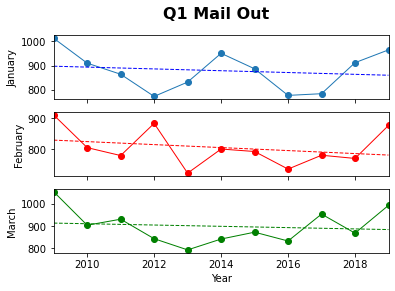

In [19]:
 # Generate a facet plot of all Q1 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q1 Mail Out", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, jan_mailout, linewidth=1, marker="o")
ax1.plot(year, janout_fit, "b--", linewidth=1)
ax1.set_ylabel("January")
ax2.plot(year, feb_mailout, linewidth=1, marker="o", color="r")
ax2.plot(year, febout_fit, "r--", linewidth=1)
ax2.set_ylabel("February")
ax3.plot(year, mar_mailout, linewidth=1, marker="o", color="g")
ax3.plot(year, marout_fit, "g--", linewidth=1)
ax3.set_ylabel("March")
ax3.set_xlabel("Year")
plt.show()

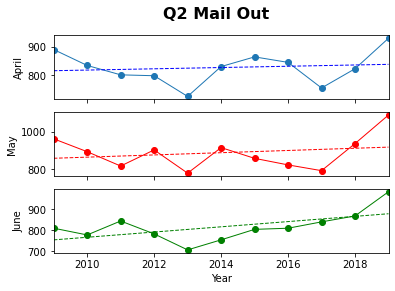

In [20]:
 # Generate a facet plot of all Q2 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q2 Mail Out", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, apr_mailout, linewidth=1, marker="o")
ax1.plot(year, aprout_fit, "b--", linewidth=1)
ax1.set_ylabel("April")
ax2.plot(year, may_mailout, linewidth=1, marker="o", color="r")
ax2.plot(year, mayout_fit, "r--", linewidth=1)
ax2.set_ylabel("May")
ax3.plot(year, jun_mailout, linewidth=1, marker="o", color="g")
ax3.plot(year, junout_fit, "g--", linewidth=1)
ax3.set_ylabel("June")
ax3.set_xlabel("Year")
plt.show()

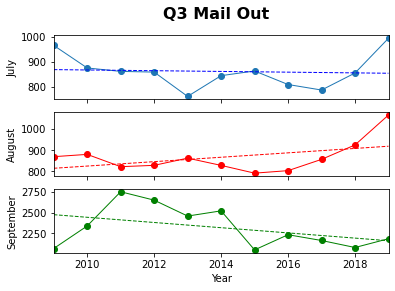

In [21]:
 # Generate a facet plot of all Q3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q3 Mail Out", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, jul_mailout, linewidth=1, marker="o")
ax1.plot(year, julout_fit, "b--", linewidth=1)
ax1.set_ylabel("July")
ax2.plot(year, aug_mailout, linewidth=1, marker="o", color="r")
ax2.plot(year, augout_fit, "r--", linewidth=1)
ax2.set_ylabel("August")
ax3.plot(year, sep_mailout, linewidth=1, marker="o", color="g")
ax3.plot(year, sepout_fit, "g--", linewidth=1)
ax3.set_ylabel("September")
ax3.set_xlabel("Year")
plt.show()

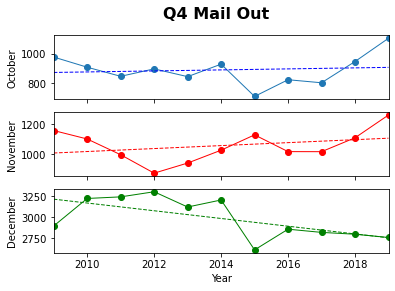

In [22]:
# Generate a facet plot of all Q4 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q4 Mail Out", fontsize=16, fontweight="bold")
ax1.set_xlim(min(year), max(year))
ax1.plot(year, oct_mailout, linewidth=1, marker="o")
ax1.plot(year, octout_fit, "b--", linewidth=1)
ax1.set_ylabel("October")
ax2.plot(year, nov_mailout, linewidth=1, marker="o", color="r")
ax2.plot(year, novout_fit, "r--", linewidth=1)
ax2.set_ylabel("November")
ax3.plot(year, dec_mailin, linewidth=1, marker="o", color="g")
ax3.plot(year, decin_fit, "g--", linewidth=1)
ax3.set_ylabel("December")
ax3.set_xlabel("Year")
plt.show()

In [23]:
# forecast the incoming mail for 2020
year = 2020
janin_forc = round(janin_slope * year + janin_int,2)
febin_forc = round(febin_slope * year + febin_int,2)
marin_forc = round(marin_slope * year + marin_int,2)
aprin_forc = round(aprin_slope * year + aprin_int,2)
mayin_forc = round(mayin_slope * year + mayin_int,2)
junin_forc = round(junin_slope * year + junin_int,2)
julin_forc = round(julin_slope * year + julin_int,2)
augin_forc = round(augin_slope * year + augin_int,2)
sepin_forc = round(sepin_slope * year + sepin_int,2)
octin_forc = round(octin_slope * year + octin_int,2)
novin_forc = round(novin_slope * year + novin_int,2)
decin_forc = round(decin_slope * year + decin_int,2)
mailin_forecast_2020 = [{'Year': 2020, 
            'Jan Mail In': janin_forc, 
            'Feb Mail In': febin_forc, 
            'Mar Mail In': marin_forc, 
            'Apr Mail In': aprin_forc, 
            'May Mail In': mayin_forc, 
            'Jun Mail In': junin_forc, 
            'Jul Mail In': julin_forc, 
            'Aug Mail In': augin_forc, 
            'Sep Mail In': sepin_forc, 
            'Oct Mail In': octin_forc, 
            'Nov Mail In': novin_forc, 
            'Dec Mail In': decin_forc
}]
mailin_for2020 = pd.DataFrame(mailin_forecast_2020)
# forecast the outgoing mail for 2020
year = 2020
janout_forc = round(janout_slope * year + janout_int,2)
febout_forc = round(febout_slope * year + febout_int,2)
marout_forc = round(marout_slope * year + marout_int,2)
aprout_forc = round(aprout_slope * year + aprout_int,2)
mayout_forc = round(mayout_slope * year + mayout_int,2)
junout_forc = round(junout_slope * year + junout_int,2)
julout_forc = round(julout_slope * year + julout_int,2)
augout_forc = round(augout_slope * year + augout_int,2)
sepout_forc = round(sepout_slope * year + sepout_int,2)
octout_forc = round(octout_slope * year + octout_int,2)
novout_forc = round(novout_slope * year + novout_int,2)
decout_forc = round(decout_slope * year + decout_int,2)
mailout_forecast_2020 = [{'Year': 2020, 
            'Jan Mail Out': janout_forc, 
            'Feb Mail Out': febout_forc, 
            'Mar Mail Out': marout_forc, 
            'Apr Mail Out': aprout_forc, 
            'May Mail Out': mayout_forc, 
            'Jun Mail Out': junout_forc, 
            'Jul Mail Out': julout_forc, 
            'Aug Mail Out': augout_forc, 
            'Sep Mail Out': sepout_forc, 
            'Oct Mail Out': octout_forc, 
            'Nov Mail Out': novout_forc, 
            'Dec Mail Out': decout_forc
}]
mailout_for2020 = pd.DataFrame(mailout_forecast_2020)

In [24]:
mailin_projected = actualmonths_mailin19.append(mailin_for2020)
mailin_projected

,Year,Jan Mail In,Feb Mail In,Mar Mail In,Apr Mail In,May Mail In,Jun Mail In,Jul Mail In,Aug Mail In,Sep Mail In,Oct Mail In,Nov Mail In,Dec Mail In
0,2009,1743.80,1594.70,1714.00,1710.10,1870.2,1893.80,1975.00,1978.50,2069.40,2296.4,2375.20,2894.70
1,2010,2071.10,1816.40,2226.80,2127.40,2372.3,2133.10,2325.60,2366.00,2340.00,2691.6,2633.30,3224.30
2,2011,2521.10,2214.50,2697.50,2689.00,2625.2,2711.00,2782.00,3035.60,2750.50,2688.4,2875.90,3243.50
3,2012,2470.90,2473.50,2755.60,2542.00,2658.9,2469.00,2622.40,2915.10,2649.80,2805.6,2768.90,3304.70
4,2013,2398.20,2149.20,2508.50,2505.60,2676.6,2460.30,2464.90,2560.30,2458.90,2441.1,2691.10,3121.90
5,2014,2284.30,2100.70,2454.70,2361.90,2460.4,2401.90,2481.60,2616.10,2521.30,2713.4,2744.10,3206.20
6,2015,2393.20,2092.80,2435.50,2090.80,2169.2,2080.80,2216.70,2145.30,2052.90,1928.1,2276.40,2608.40
7,2016,1998.80,1762.80,2035.40,2041.00,2074.3,1987.30,2132.00,2190.80,2235.00,2336.7,2456.10,2856.30
8,2017,2146.40,1985.80,2327.50,2119.20,2111.3,2233.00,2277.90,2401.90,2165.70,2195.5,2333.90,2818.10
9,2018,2056.10,1798.80,2179.40,2073.80,2143.1,2151.70,2108.40,2176.80,2081.60,2105.6,2393.10,2796.10


In [25]:
# prepare data for overall forecasted vs. actual
# Jan
year = mailin_projected["Year"]
janin_proj = mailin_projected["Jan Mail In"]
janin_act = actual_mailin_with2020["Jan Mail In"]
# Feb
year = mailin_projected["Year"]
febin_proj = mailin_projected["Feb Mail In"]
febin_act = actual_mailin_with2020["Feb Mail In"]
# Mar
year = mailin_projected["Year"]
marin_proj = mailin_projected["Mar Mail In"]
marin_act = actual_mailin_with2020["Mar Mail In"]
# Apr
year = mailin_projected["Year"]
aprin_proj = mailin_projected["Apr Mail In"]
aprin_act = actual_mailin_with2020["Apr Mail In"]
# May
year = mailin_projected["Year"]
mayin_proj = mailin_projected["May Mail In"]
mayin_act = actual_mailin_with2020["May Mail In"]
# Jun
year = mailin_projected["Year"]
junin_proj = mailin_projected["Jun Mail In"]
junin_act = actual_mailin_with2020["Jun Mail In"]
# Jul
year = mailin_projected["Year"]
julin_proj = mailin_projected["Jul Mail In"]
julin_act = actual_mailin_with2020["Jul Mail In"]
# Aug
year = mailin_projected["Year"]
augin_proj = mailin_projected["Aug Mail In"]
augin_act = actual_mailin_with2020["Aug Mail In"]
# Sep
year = mailin_projected["Year"]
sepin_proj = mailin_projected["Sep Mail In"]
sepin_act = actual_mailin_with2020["Sep Mail In"]
# Oct
year = mailin_projected["Year"]
octin_proj = mailin_projected["Oct Mail In"]
octin_act = actual_mailin_with2020["Oct Mail In"]
# Nov
year = mailin_projected["Year"]
novin_proj = mailin_projected["Nov Mail In"]
novin_act = actual_mailin_with2020["Nov Mail In"]
# Dec
year = mailin_projected["Year"]
decin_proj = mailin_projected["Dec Mail In"]
decin_act = actual_mailin_with2020["Dec Mail In"]

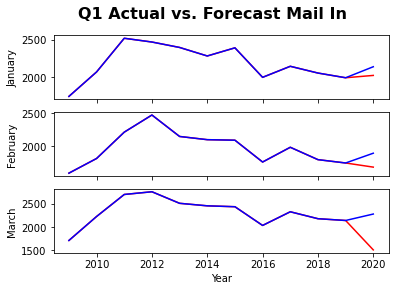

In [26]:
# Generate a facet plot of all Q1 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q1 Actual vs. Forecast Mail In ", fontsize=16, fontweight="bold")
ax1.plot(year, janin_act, label='Actual', color='red')
ax1.plot(year, janin_proj, label='Forecasted', color='blue')
ax1.set_ylabel("January")
ax2.plot(year, febin_act, label='Actual', color='red')
ax2.plot(year, febin_proj, label='Forecasted', color='blue')
ax2.set_ylabel("February")
ax3.plot(year, marin_act, label='Actual', color='red')
ax3.plot(year, marin_proj, label='Forecasted', color='blue')
ax3.set_ylabel("March")
ax3.set_xlabel("Year")
plt.show()

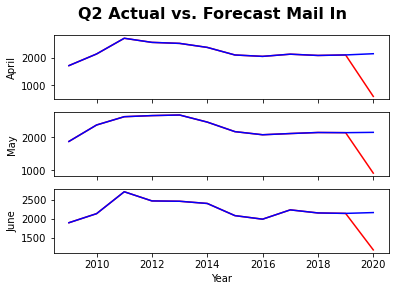

In [27]:
# Generate a facet plot of all Q2 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q2 Actual vs. Forecast Mail In ", fontsize=16, fontweight="bold")
ax1.plot(year, aprin_act, label='Actual', color='red')
ax1.plot(year, aprin_proj, label='Forecasted', color='blue')
ax1.set_ylabel("April")
ax2.plot(year, mayin_act, label='Actual', color='red')
ax2.plot(year, mayin_proj, label='Forecasted', color='blue')
ax2.set_ylabel("May")
ax3.plot(year, junin_act, label='Actual', color='red')
ax3.plot(year, junin_proj, label='Forecasted', color='blue')
ax3.set_ylabel("June")
ax3.set_xlabel("Year")
plt.show()

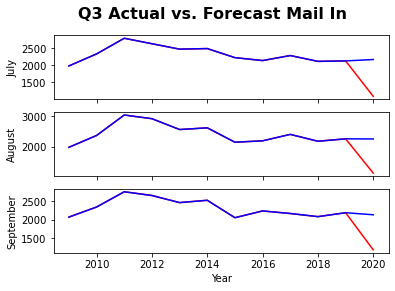

In [28]:
# Generate a facet plot of all Q3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q3 Actual vs. Forecast Mail In ", fontsize=16, fontweight="bold")
ax1.plot(year, julin_act, label='Actual', color='red')
ax1.plot(year, julin_proj, label='Forecasted', color='blue')
ax1.set_ylabel("July")
ax2.plot(year, augin_act, label='Actual', color='red')
ax2.plot(year, augin_proj, label='Forecasted', color='blue')
ax2.set_ylabel("August")
ax3.plot(year, sepin_act, label='Actual', color='red')
ax3.plot(year, sepin_proj, label='Forecasted', color='blue')
ax3.set_ylabel("September")
ax3.set_xlabel("Year")
plt.show()

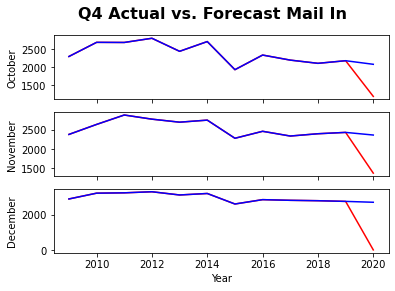

In [29]:
# Generate a facet plot of all Q4 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q4 Actual vs. Forecast Mail In ", fontsize=16, fontweight="bold")
ax1.plot(year, octin_act, label='Actual', color='red')
ax1.plot(year, octin_proj, label='Forecasted', color='blue')
ax1.set_ylabel("October")
ax2.plot(year, novin_act, label='Actual', color='red')
ax2.plot(year, novin_proj, label='Forecasted', color='blue')
ax2.set_ylabel("November")
ax3.plot(year, decin_act, label='Actual', color='red')
ax3.plot(year, decin_proj, label='Forecasted', color='blue')
ax3.set_ylabel("December")
ax3.set_xlabel("Year")
plt.show()

In [30]:
mailout_projected = actualmonths_mailout19.append(mailout_for2020)
mailout_projected

,Year,Jan Mail Out,Feb Mail Out,Mar Mail Out,Apr Mail Out,May Mail Out,Jun Mail Out,Jul Mail Out,Aug Mail Out,Sep Mail Out,Oct Mail Out,Nov Mail Out,Dec Mail Out
0,2009,1013.20,909.20,1052.80,890.30,961.90,809.20,964.90,868.90,2069.40,976.40,1157.5,1802.40
1,2010,910.10,804.30,903.70,834.60,893.20,777.30,874.60,879.60,2340.00,907.40,1100.9,1695.40
2,2011,864.20,778.80,930.40,801.80,816.70,843.30,860.80,822.30,2750.50,845.70,995.5,1592.30
3,2012,772.40,882.30,843.50,798.70,902.70,782.30,858.00,828.60,2649.80,896.10,872.1,1538.60
4,2013,831.80,722.20,793.60,726.40,778.70,706.60,760.60,862.10,2458.90,843.40,939.7,1480.20
5,2014,950.90,799.80,842.00,830.80,915.10,754.20,843.70,828.30,2521.30,928.20,1025.9,1562.40
6,2015,886.80,791.80,872.60,864.60,857.70,803.70,862.50,792.20,2052.90,709.40,1128.6,1468.40
7,2016,776.60,735.30,833.20,845.40,822.70,809.10,808.20,803.90,2235.00,822.50,1016.3,1415.00
8,2017,783.60,779.80,953.30,755.90,792.00,839.10,786.10,856.40,2165.70,801.90,1015.9,1484.00
9,2018,912.10,769.50,868.30,823.10,936.60,867.20,854.30,923.60,2081.60,946.00,1108.9,1472.40


In [31]:
# plot graph showing overall forecasted vs. actual
# Jan
year = mailout_projected["Year"]
janout_proj = mailout_projected["Jan Mail Out"]
janout_act = actual_mailout_with2020["Jan Mail Out"]
# Feb
year = mailout_projected["Year"]
febout_proj = mailout_projected["Feb Mail Out"]
febout_act = actual_mailout_with2020["Feb Mail Out"]
# Mar
year = mailout_projected["Year"]
marout_proj = mailout_projected["Mar Mail Out"]
marout_act = actual_mailout_with2020["Mar Mail Out"]
# Apr
year = mailout_projected["Year"]
aprout_proj = mailout_projected["Apr Mail Out"]
aprout_act = actual_mailout_with2020["Apr Mail Out"]
# May
year = mailout_projected["Year"]
mayout_proj = mailout_projected["May Mail Out"]
mayout_act = actual_mailout_with2020["May Mail Out"]
# Jun
year = mailout_projected["Year"]
junout_proj = mailout_projected["Jun Mail Out"]
junout_act = actual_mailout_with2020["Jun Mail Out"]
# Jul
year = mailout_projected["Year"]
julout_proj = mailout_projected["Jul Mail Out"]
julout_act = actual_mailout_with2020["Jul Mail Out"]
# Aug
year = mailout_projected["Year"]
augout_proj = mailout_projected["Aug Mail Out"]
augout_act = actual_mailout_with2020["Aug Mail Out"]
# Sep
year = mailout_projected["Year"]
sepout_proj = mailout_projected["Sep Mail Out"]
sepout_act = actual_mailout_with2020["Sep Mail Out"]
# Oct
year = mailout_projected["Year"]
octout_proj = mailout_projected["Oct Mail Out"]
octout_act = actual_mailout_with2020["Oct Mail Out"]
# Nov
year = mailout_projected["Year"]
novout_proj = mailout_projected["Nov Mail Out"]
novout_act = actual_mailout_with2020["Nov Mail Out"]
# Dec
year = mailout_projected["Year"]
decout_proj = mailout_projected["Dec Mail Out"]
decout_act = actual_mailout_with2020["Dec Mail Out"]

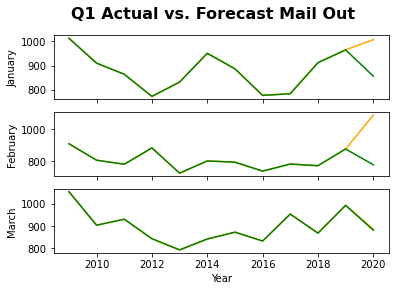

In [32]:
# Generate a facet plot of all Q1 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q1 Actual vs. Forecast Mail Out ", fontsize=16, fontweight="bold")
ax1.plot(year, janout_act, label='Actual', color='orange')
ax1.plot(year, janout_proj, label='Forecasted', color='green')
ax1.set_ylabel("January")
ax2.plot(year, febout_act, label='Actual', color='orange')
ax2.plot(year, febout_proj, label='Forecasted', color='green')
ax2.set_ylabel("February")
ax3.plot(year, marout_act, label='Actual', color='orange')
ax3.plot(year, marout_proj, label='Forecasted', color='green')
ax3.set_ylabel("March")
ax3.set_xlabel("Year")
plt.show()

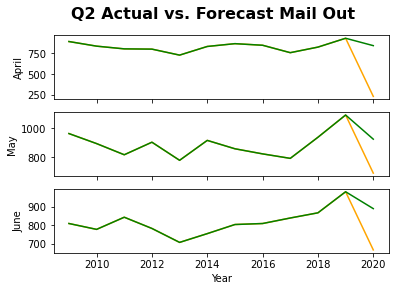

In [33]:
# Generate a facet plot of all Q2 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q2 Actual vs. Forecast Mail Out ", fontsize=16, fontweight="bold")
ax1.plot(year, aprout_act, label='Actual', color='orange')
ax1.plot(year, aprout_proj, label='Forecasted', color='green')
ax1.set_ylabel("April")
ax2.plot(year, mayout_act, label='Actual', color='orange')
ax2.plot(year, mayout_proj, label='Forecasted', color='green')
ax2.set_ylabel("May")
ax3.plot(year, junout_act, label='Actual', color='orange')
ax3.plot(year, junout_proj, label='Forecasted', color='green')
ax3.set_ylabel("June")
ax3.set_xlabel("Year")
plt.show()

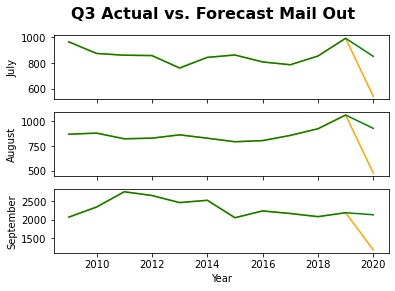

In [34]:
# Generate a facet plot of all Q3 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q3 Actual vs. Forecast Mail Out ", fontsize=16, fontweight="bold")
ax1.plot(year, julout_act, label='Actual', color='orange')
ax1.plot(year, julout_proj, label='Forecasted', color='green')
ax1.set_ylabel("July")
ax2.plot(year, augout_act, label='Actual', color='orange')
ax2.plot(year, augout_proj, label='Forecasted', color='green')
ax2.set_ylabel("August")
ax3.plot(year, sepout_act, label='Actual', color='orange')
ax3.plot(year, sepout_proj, label='Forecasted', color='green')
ax3.set_ylabel("September")
ax3.set_xlabel("Year")
plt.show()

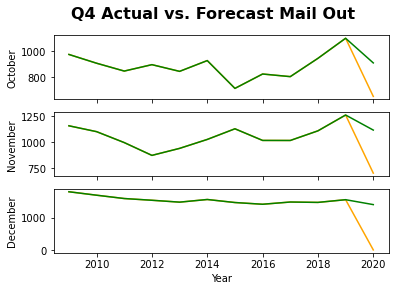

In [35]:
# Generate a facet plot of all Q4 figures
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
fig.suptitle("Q4 Actual vs. Forecast Mail Out ", fontsize=16, fontweight="bold")
ax1.plot(year, octout_act, label='Actual', color='orange')
ax1.plot(year, octout_proj, label='Forecasted', color='green')
ax1.set_ylabel("October")
ax2.plot(year, novout_act, label='Actual', color='orange')
ax2.plot(year, novout_proj, label='Forecasted', color='green')
ax2.set_ylabel("November")
ax3.plot(year, decout_act, label='Actual', color='orange')
ax3.plot(year, decout_proj, label='Forecasted', color='green')
ax3.set_ylabel("December")
ax3.set_xlabel("Year")
plt.show()

In [36]:
# actual Mail In data up to 2019
df1718_19 = pd.merge(df17_18, df19, on=['Mail In'], how='outer', sort=False)
df09_16 = pd.merge(df0910_1112, df1314_1516, on=['Mail In'], how='outer', sort=False)
df09_19 = pd.merge(df09_16, df1718_19, on=['Mail In'], how='outer', sort=False)
# actual Mail Out data up to 2019
odf1718_19 = pd.merge(odf17_18, odf19, on=['Mail Out'], how='outer', sort=False)
odf09_16 = pd.merge(odf0910_1112, odf1314_1516, on=['Mail Out'], how='outer', sort=False)
odf09_19 = pd.merge(odf09_16, odf1718_19, on=['Mail Out'], how='outer', sort=False)

In [37]:
# Mail In (Projected)
in20 = mailin_for2020.T
in20 = in20.drop('Year')
in20.columns = ["Mail In"]
inproj2020 = df09_19.append(in20)
inproj2020 = inproj2020.drop('Dec Mail In')
# Mail Out (Projected)
out20 = mailout_for2020.T
out20.columns = ["Mail Out"]
outproj2020 = odf09_19.append(out20)
outproj2020 = outproj2020.drop('Year')
outproj2020 = outproj2020.drop('Dec Mail Out')

Text(0, 0.5, 'Total Mail In/Out')

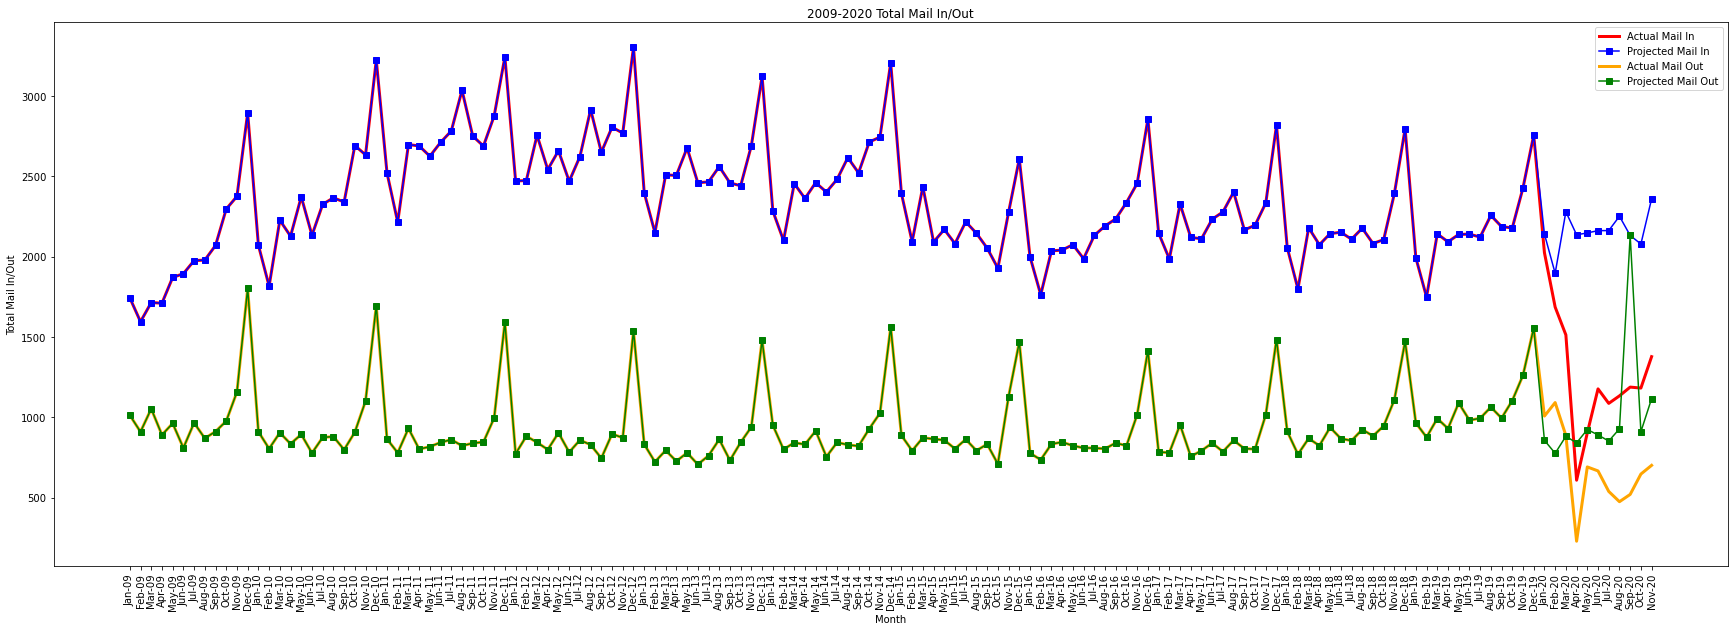

In [38]:
# Plot all data from Jan 2009 - Nov 2020
xcoord = ['Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09', 'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09', 'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12', 'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20']
fig1, ax1 = plt.subplots(figsize=(30,10))
plt.plot(xcoord, df09_20, label='Actual Mail In', color='red', linewidth=3.0)
plt.plot(xcoord, inproj2020, label='Projected Mail In', color='blue', marker='s')
plt.plot(xcoord, odf09_20, label='Actual Mail Out', color='orange', linewidth=3.0)
plt.plot(xcoord, outproj2020, label='Projected Mail Out', color='green', marker='s')
plt.legend()
plt.title("2009-2020 Total Mail In/Out")
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Total Mail In/Out")

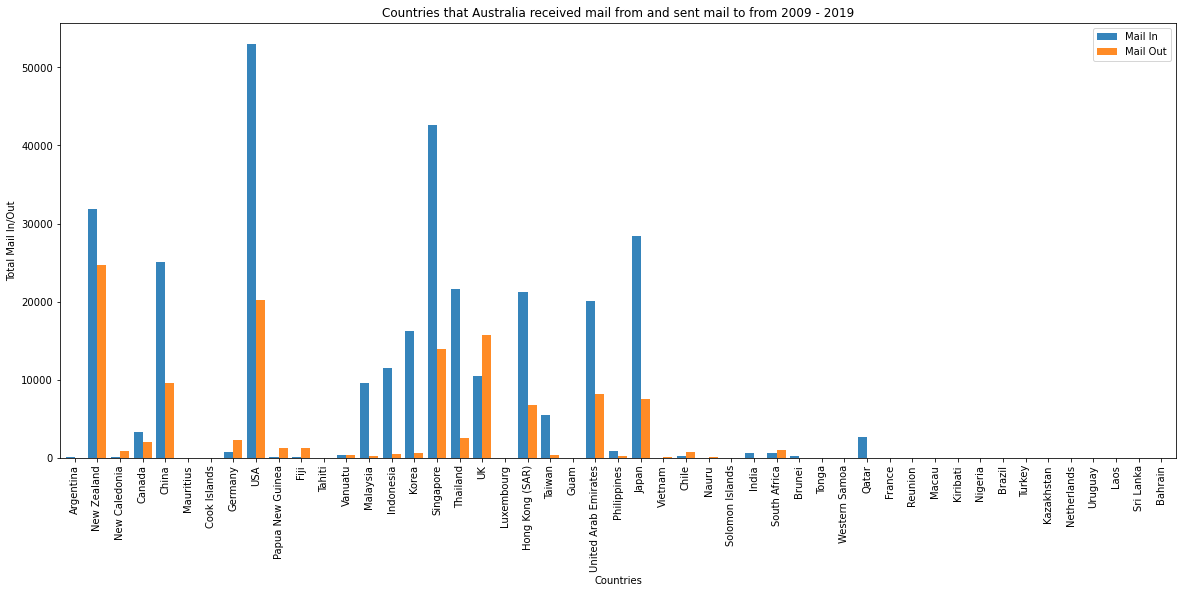

In [39]:
# Countries to and from (2009 - 2019) Mail In and Out over the 10 years prior to 2020 
grcountry_2009to2019 = cleanmail_to2019.groupby(["Country to/from"],sort=False).sum()
gcountries_2009to2019 = grcountry_2009to2019[["Mail In", "Mail Out"]]
gcountries_2009to2019.plot(kind="bar", width=0.8, alpha=0.9, figsize=(20,8))
plt.title("Countries that Australia received mail from and sent mail to from 2009 - 2019")
plt.xlabel("Countries")
plt.ylabel("Total Mail In/Out")
plt.show()

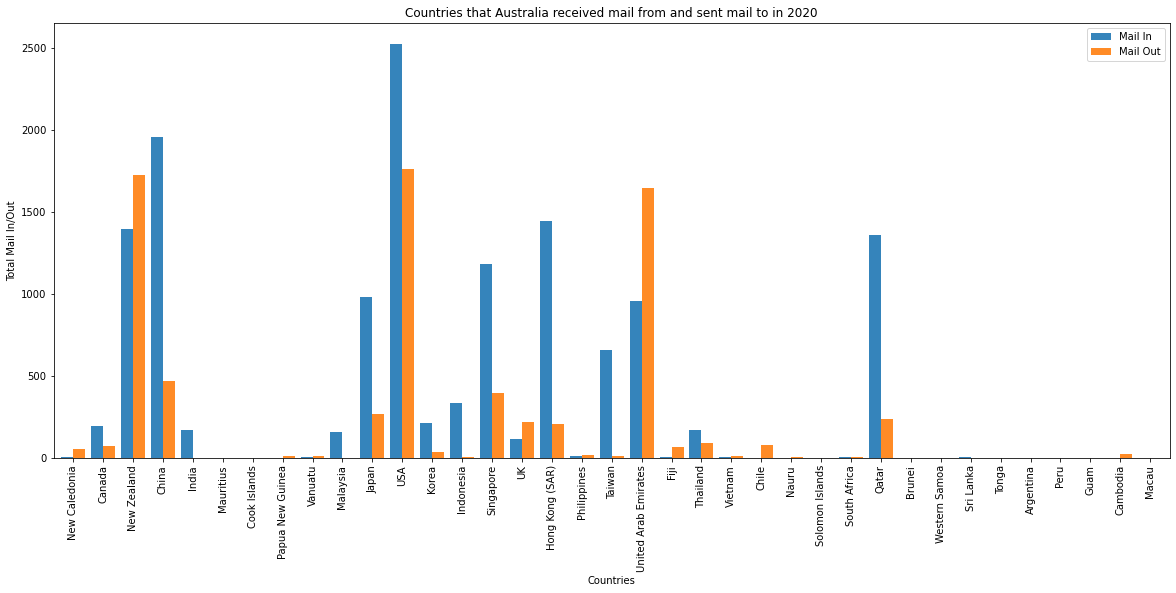

In [40]:
# Countries to and from - Mail In and Out Activity in 2020
new_only2020 = newdf[newdf["Year"].isin(["2020"])]
grcountry_2020 = new_only2020.groupby(["Country to/from"],sort=False).sum()
gcountries_2020 = grcountry_2020[["Mail In", "Mail Out"]]
gcountries_2020.plot(kind="bar", width=0.8, alpha=0.9, figsize=(20,8))
plt.title("Countries that Australia received mail from and sent mail to in 2020")
plt.xlabel("Countries")
plt.ylabel("Total Mail In/Out")
plt.show()